In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L0xMTS13b3Jrc2hvcA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/usr/lib/python3.10/importlib/_bootstrap.py": 1755268363.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1755268363.0, "/usr/lib/python3.10/codecs.py": 1755268363.0, "/usr/lib/python3.10/encodings/aliases.py": 1755268363.0, "/usr/lib/python3.10/encodings/__init__.py": 1755268363.0, "/usr/lib/python3.10/encodings/utf_8.py": 1755268363.0, "/usr/lib/python3.10/abc.py": 1755268363.0, "/usr/lib/python3.10/io.py": 1755268363.0, "/usr/lib/python3.10/stat.py": 1755268363.0, "/usr/lib/python3.10/_collections_abc.py": 1755268363.0, "/usr/lib/python3.10/genericpath.py": 1755268363.0, "/usr/lib/python3.10/posixpath.py": 1755268363.0, "/usr/lib/python3.10/os.py": 1755268363.0, "/usr/lib/python3.10/_sitebuiltins.py": 1755268363.0, "/usr/lib/python3.10/sitecustomize.py": 1755268363.0, "/usr/lib/python3.10/site.py": 1755268363.0, "/usr/lib/python3.10/warnings.py": 1755268363.0, "/usr/lib/python3.10/importlib/__init__.py": 1755268363.0, "/usr/lib/python3.10/importlib/machinery.py": 1755268

In [2]:
#| eval: false
!sudo apt update
!sudo apt install -y pciutils zstd
!curl -fsSL https://ollama.com/install.sh | sh
!pip install ollama kagglehub kagglehub[pandas-datasets]

# Fancy little subprocess trick to get ollama working in Colab workbooks
import subprocess
proccess = subprocess.Popen(['ollama', 'serve'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, stdin=subprocess.DEVNULL, close_fds=True)

In [3]:
#| eval: false
!ollama pull llama3.1:8b
!ollama pull qwen3:8b
!ollama pull gemma3:4b
!ollama pull deepseek-r1:8b

print('Done!')

In [4]:
import ollama

def query_llm(prompt, model):
    """
    Given a 'prompt' and the name of a model,
    return the LLM's text response (uses ollama SDK).
    Because the model has a default, we don't need to be explicit in which model
    to use if you don't want to.
    """
    # Send the request to Ollama and get the response
    response = ollama.chat(
        model=model, messages=[{"role": "user", "content": prompt}]
    )
    # Return ONLY the LLM's textual answer from the response
    return response.message.content

In [5]:
# Examples (ctrl+/ to use):
# prompt = 'What is the role of performance in australian parliamentary debates'
# prompt = 'Briefly tell me: What does a cat say?'
prompt = 'What is the definition of framing in communication science?'

In [6]:
for model in ['llama3.1:8b', 'qwen3:8b', 'gemma3:4b', 'deepseek-r1:8b']:
    print(f'{model} is analysing your question...\n')
    print("-" * 10)
    answer = query_llm(prompt, model)
    print(f'{model} says:\n{answer}\n')
    print("-" * 100)

llama3.1:8b is analysing your question...

----------


llama3.1:8b says:
In Communication Science, "framing" refers to a process where the way information is presented or described influences how it is perceived, understood, and processed by an audience. This concept was popularized by linguist George Lakoff (1970) and has since been developed into a key area of study in communication theory.

Framing involves selecting and presenting information in a way that emphasizes certain aspects, attributes, or interpretations over others. The goal is to shape public opinion, attitudes, and decisions by influencing how people think about and experience an issue, product, policy, or event.

There are several key characteristics of framing:

1. **Selective emphasis**: Framing involves highlighting some aspects while downplaying or ignoring others.
2. **Semantic meaning**: Framing assigns meaning to information through the choice of words, phrases, and narratives used.
3. **Persuasive intent**: Framing is often used with a specific goal in mind, such 

qwen3:8b says:
In communication science, **framing** refers to the process of **selecting, highlighting, and organizing information** in a way that shapes how an audience perceives, interprets, and responds to a particular issue or event. It involves structuring the context, language, and emphasis of a message to influence the audience's understanding of reality. Key aspects of framing include:

1. **Selection of Information**: Choosing which facts, details, or perspectives are emphasized while omitting others.  
2. **Contextualization**: Providing a framework that gives meaning to the information, such as framing an issue as a "crisis" or a "solution."  
3. **Language and Metaphors**: Using specific words, phrases, or metaphors (e.g., "war on drugs" vs. "public health initiative") to shape perception.  
4. **Emphasis and Prioritization**: Highlighting certain aspects (e.g., economic benefits vs. environmental costs) to guide interpretation.  
5. **Emotional Resonance**: Evoking specif

gemma3:4b says:
Framing, in communication science, is a really important concept that describes **how information is presented to influence how it's understood and interpreted by an audience.** It's not about *what* you say, but *how* you say it. 

Here's a breakdown of the definition and key aspects:

**Core Definition:**

Framing refers to the process of selecting and highlighting certain aspects of a situation while obscuring others.  It’s about constructing a narrative around an issue that emphasizes particular angles, values, and emotions.


**Key Components & How it Works:**

* **Selection:**  A communicator (journalist, politician, activist, etc.) consciously or unconsciously chooses which elements of a story or event to include.
* **Emphasis:**  They then highlight those selected elements, often through specific language, images, or context.
* **Presentation:**  This selection and emphasis is done in a way that guides the audience’s interpretation and understanding.

**Differen

deepseek-r1:8b says:
Okay, let's break down the definition of framing in communication science.

## Definition of Framing

In communication science, **framing** refers to the process by which information is selected, emphasized, arranged, and labeled to shape the audience's perception and understanding of an issue, event, or concept.

Think of it as the *container* or *structure* through which information is presented. The "frame" itself isn't the raw material (like news events), but rather the specific lens, perspective, or narrative used to interpret and communicate that material.

## Key Elements of the Definition

1.  **Selection:** Choosing which aspects of a topic to highlight and which to omit.
2.  **Emphasis:** Giving certain elements more prominence or importance than others.
3.  **Arrangement:** Deciding the order, structure, and flow of information presented.
4.  **Labeling/Definition:** Using specific words, phrases, or concepts to define and categorize the information (e.g

In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "twitter_sentiment_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "edqian/twitter-climate-change-sentiment-dataset",
  file_path,
)

print("First 5 records:\n")
df.head()

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_818/404345684.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:



,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


<Axes: title={'center': 'Label distribution'}, xlabel='sentiment_text'>

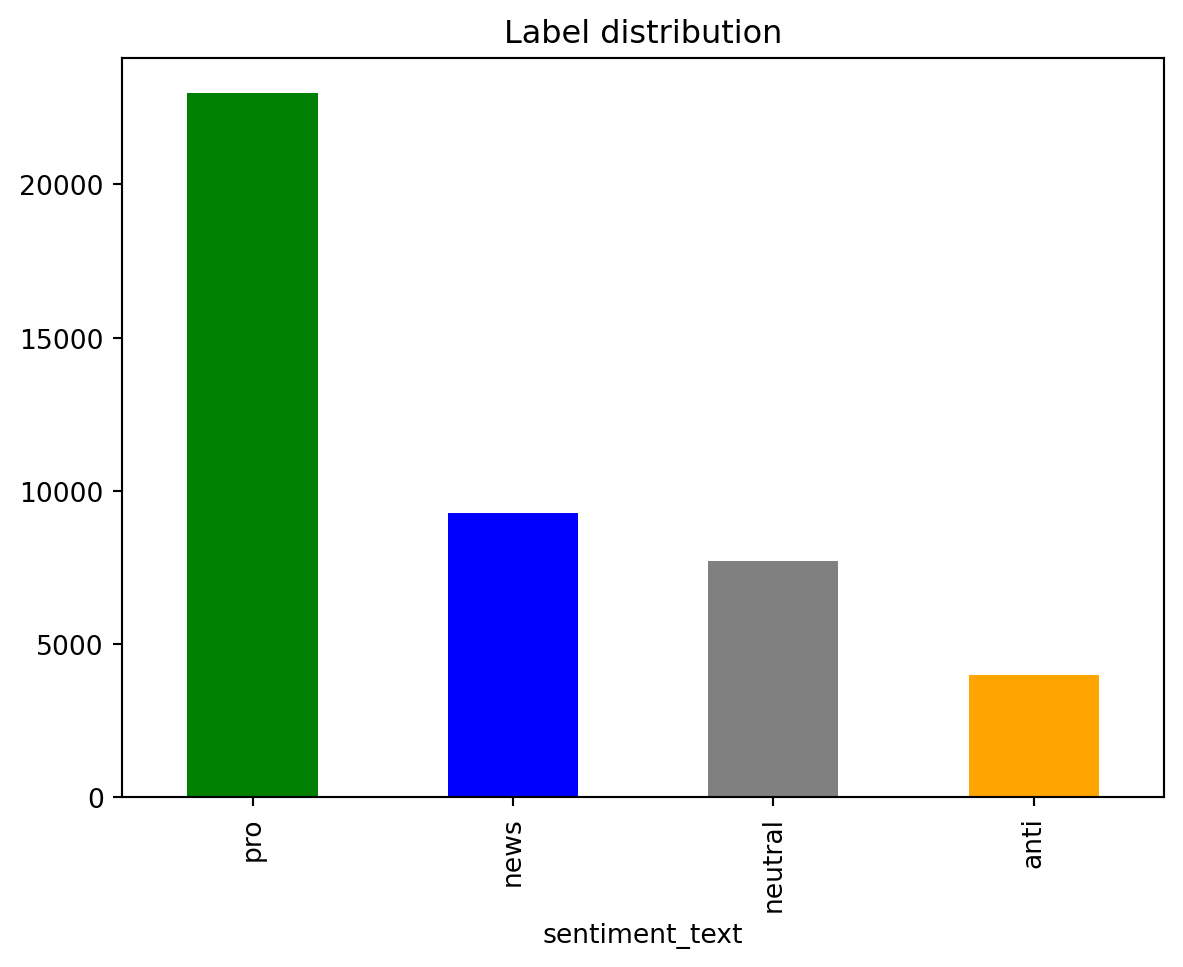

In [8]:
sentiment_map = {
    2: "news",
    1: "pro",
    0: "neutral",
    -1: "anti"
}

df["sentiment_text"] = df["sentiment"].map(sentiment_map)

df['sentiment_text'].value_counts().plot(title='Label distribution', kind='bar', color=['green', 'blue', 'gray', 'orange'])

In [9]:
# remove urls
df['clean_message'] = df['message'].str.replace(r'http\S+|www\S+', '', regex=True)

# remove handle after 'RT @'
df['clean_message'] = df['clean_message'].str.replace(r'^RT\s+@\w+:\s*', '', regex=True)

# drop ascii characters
df['clean_message'] = df['clean_message'].str.encode('ascii', 'ignore').str.decode('ascii')

df[['message', 'clean_message']].head()

,message,clean_message
0,@tiniebeany climate change is an interesting h...,@tiniebeany climate change is an interesting h...
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"Watch #BeforeTheFlood right here, as @LeoDiCap..."
2,Fabulous! Leonardo #DiCaprio's film on #climat...,Fabulous! Leonardo #DiCaprio's film on #climat...
3,RT @Mick_Fanning: Just watched this amazing do...,Just watched this amazing documentary by leona...
4,"RT @cnalive: Pranita Biswasi, a Lutheran from ...","Pranita Biswasi, a Lutheran from Odisha, gives..."


In [10]:
# for testing -  take a sample

df_samp = df.sample(n=25, random_state=67)
df_samp

,sentiment,message,tweetid,sentiment_text,clean_message
24190,1,"RT @DesiJed: Anyway, climate change is about t...",884559057188683777,pro,"Anyway, climate change is about to kill us all..."
22718,0,@gtiso Perhaps it is intended to represent wha...,872318590703292416,neutral,@gtiso Perhaps it is intended to represent wha...
12884,2,Netherlands bets €1m on global #climate #adapt...,829243399115067393,news,Netherlands bets 1m on global #climate #adapta...
19526,1,Use some common sense.' - Person that proceeds...,854697826139426816,pro,Use some common sense.' - Person that proceeds...
38695,1,Together we can cool the planet! How agroindus...,654947523791032320,pro,Together we can cool the planet! How agroindus...
5938,1,RT @StephenSchlegel: she's thinking about how ...,798782668129173504,pro,she's thinking about how she's going to die be...
42772,1,RT @EarnKnowledge: This photo by Kerstin Lange...,763227585392279552,pro,This photo by Kerstin Langenberger shows how p...
35273,2,RT @timothychou: Big data might be the missing...,957627232708636672,news,Big data might be the missing puzzle piece in ...
23430,1,RT @affair_state: Unless the critical issue of...,877599339450736640,pro,Unless the critical issue of global warming do...
7379,1,RT @SenSanders: If we don't address climate ch...,800519074853703681,pro,If we don't address climate change there'll be...


In [11]:
from pydantic import BaseModel
from typing import Optional

class ResponseFormat(BaseModel):
    hero: Optional[str] = None
    victim: Optional[str] = None
    villain: Optional[str] = None

In [12]:
from tqdm import tqdm

def transform_data(df, model, response_format, prompt, think = False):
    cols = response_format.__fields__.keys()
    for col in cols:
        df[col] = None
    if think:
        df['reasoning'] = None

    for idx, row in tqdm(df.iterrows()):
        response = ollama.chat(
            model=model,
            messages=[{'role': 'system', 'content': prompt}, {'role': 'user',
            'content': row['clean_message']}],
            format=response_format.model_json_schema(),
            think = think
        )
        parsed_response = response_format.model_validate_json(response.message.content)
        for col in cols:
            df.at[idx, col] = getattr(parsed_response, col)
        if think:
            df.at[idx, 'reasoning'] = response.message.thinking

    return df

In [13]:
import random
models = ['llama3.1:8b', 'qwen3:8b', 'gemma3:4b', 'deepseek-r1:8b']
model = random.choice(models)
print("Using model:", model)

Using model: llama3.1:8b


In [14]:
prompt_zeroshot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task: Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [15]:
model= 'llama3.1:8b'
response_format = ResponseFormat()
response_df = transform_data(df_samp, model, response_format, prompt=prompt_zeroshot)

response_df

/tmp/ipykernel_818/179031842.py:4: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use `model_fields` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cols = response_format.__fields__.keys()


0it [00:00, ?it/s]

1it [00:02,  2.12s/it]

2it [00:02,  1.03s/it]

3it [00:02,  1.47it/s]

4it [00:02,  1.84it/s]

5it [00:03,  2.21it/s]

6it [00:03,  2.57it/s]

7it [00:03,  2.87it/s]

8it [00:04,  3.11it/s]

9it [00:04,  3.20it/s]

10it [00:04,  3.41it/s]

12it [00:04,  4.89it/s]

13it [00:05,  4.43it/s]

14it [00:05,  4.13it/s]

15it [00:05,  4.92it/s]

16it [00:05,  3.77it/s]

17it [00:06,  3.76it/s]

18it [00:06,  3.72it/s]

19it [00:06,  3.77it/s]

20it [00:07,  3.70it/s]

21it [00:07,  3.62it/s]

22it [00:07,  3.74it/s]

23it [00:07,  3.27it/s]

24it [00:08,  3.39it/s]

25it [00:08,  4.13it/s]

25it [00:08,  3.00it/s]

,sentiment,message,tweetid,sentiment_text,clean_message,hero,victim,villain
24190,1,"RT @DesiJed: Anyway, climate change is about t...",884559057188683777,pro,"Anyway, climate change is about to kill us all...",None,None,Trump
22718,0,@gtiso Perhaps it is intended to represent wha...,872318590703292416,neutral,@gtiso Perhaps it is intended to represent wha...,None,None,her Party
12884,2,Netherlands bets €1m on global #climate #adapt...,829243399115067393,news,Netherlands bets 1m on global #climate #adapta...,None,None,none
19526,1,Use some common sense.' - Person that proceeds...,854697826139426816,pro,Use some common sense.' - Person that proceeds...,None,None,Person that proceeds to tell
38695,1,Together we can cool the planet! How agroindus...,654947523791032320,pro,Together we can cool the planet! How agroindus...,None,None,agroindustry
5938,1,RT @StephenSchlegel: she's thinking about how ...,798782668129173504,pro,she's thinking about how she's going to die be...,None,None,your husband
42772,1,RT @EarnKnowledge: This photo by Kerstin Lange...,763227585392279552,pro,This photo by Kerstin Langenberger shows how p...,None,None,climate change
35273,2,RT @timothychou: Big data might be the missing...,957627232708636672,news,Big data might be the missing puzzle piece in ...,None,None,climate change
23430,1,RT @affair_state: Unless the critical issue of...,877599339450736640,pro,Unless the critical issue of global warming do...,None,None,global warming
7379,1,RT @SenSanders: If we don't address climate ch...,800519074853703681,pro,If we don't address climate change there'll be...,None,None,fossi


In [16]:
prompt_fewshot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task: Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    victim: None
    villain: None

2. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    hero: None
    victim: poor communities
    villain: None

3. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    victim: None
    villain: None

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [17]:
response_df = transform_data(df_samp, model, response_format, prompt=prompt_fewshot)

response_df

/tmp/ipykernel_818/179031842.py:4: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use `model_fields` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cols = response_format.__fields__.keys()


0it [00:00, ?it/s]

1it [00:00,  2.63it/s]

2it [00:00,  2.44it/s]

3it [00:00,  3.65it/s]

4it [00:01,  3.07it/s]

5it [00:01,  2.59it/s]

6it [00:01,  3.45it/s]

7it [00:02,  3.39it/s]

8it [00:02,  2.88it/s]

9it [00:03,  2.79it/s]

10it [00:03,  2.46it/s]

11it [00:03,  2.57it/s]

12it [00:04,  2.81it/s]

13it [00:04,  2.52it/s]

14it [00:04,  3.20it/s]

15it [00:05,  3.09it/s]

16it [00:05,  2.78it/s]

17it [00:05,  2.75it/s]

18it [00:06,  2.70it/s]

19it [00:06,  2.92it/s]

20it [00:07,  2.88it/s]

21it [00:07,  2.81it/s]

22it [00:07,  2.61it/s]

23it [00:08,  2.61it/s]

24it [00:08,  2.58it/s]

25it [00:08,  2.79it/s]

25it [00:08,  2.81it/s]

,sentiment,message,tweetid,sentiment_text,clean_message,hero,victim,villain
24190,1,"RT @DesiJed: Anyway, climate change is about t...",884559057188683777,pro,"Anyway, climate change is about to kill us all...",None,None,Trump
22718,0,@gtiso Perhaps it is intended to represent wha...,872318590703292416,neutral,@gtiso Perhaps it is intended to represent wha...,None,None,her Party
12884,2,Netherlands bets €1m on global #climate #adapt...,829243399115067393,news,Netherlands bets 1m on global #climate #adapta...,None,None,None
19526,1,Use some common sense.' - Person that proceeds...,854697826139426816,pro,Use some common sense.' - Person that proceeds...,None,None,Conspiracy theorist
38695,1,Together we can cool the planet! How agroindus...,654947523791032320,pro,Together we can cool the planet! How agroindus...,None,None,agroindustry
5938,1,RT @StephenSchlegel: she's thinking about how ...,798782668129173504,pro,she's thinking about how she's going to die be...,None,None,None
42772,1,RT @EarnKnowledge: This photo by Kerstin Lange...,763227585392279552,pro,This photo by Kerstin Langenberger shows how p...,None,None,None
35273,2,RT @timothychou: Big data might be the missing...,957627232708636672,news,Big data might be the missing puzzle piece in ...,None,None,None
23430,1,RT @affair_state: Unless the critical issue of...,877599339450736640,pro,Unless the critical issue of global warming do...,None,None,None
7379,1,RT @SenSanders: If we don't address climate ch...,800519074853703681,pro,If we don't address climate change there'll be...,scientists,None,fossi


In [18]:
prompt_cot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task:
Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Chain of thought:
1. Identify the central issue: Determine what climate-related problem or event the tweet is discussing.
2. Look for conflict or tension: Check if the tweet highlights a problem, blame, praise, or action.
3. Detect heroes: Identify entities praised for mitigating or solving the issue.
4. Detect victims: Identify entities suffering negative consequences of the issue.
5. Detect villains: Identify entities blamed for causing or worsening the issue.

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [19]:
thinking_model = 'deepseek-r1:8b'
response_format = ResponseFormat()
response_df = transform_data(df_samp, thinking_model, response_format, prompt=prompt_cot, think = True)

response_df

/tmp/ipykernel_818/179031842.py:4: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use `model_fields` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cols = response_format.__fields__.keys()


0it [00:00, ?it/s]

1it [00:09,  9.92s/it]

2it [00:26, 13.76s/it]

3it [00:37, 12.77s/it]

4it [00:49, 12.15s/it]

5it [01:00, 11.81s/it]

6it [01:12, 11.86s/it]

7it [01:26, 12.72s/it]

8it [01:31, 10.28s/it]

9it [01:40,  9.69s/it]

10it [01:56, 11.77s/it]

11it [02:03, 10.38s/it]

12it [02:09,  8.94s/it]

13it [02:29, 12.13s/it]

14it [02:35, 10.37s/it]

15it [02:39,  8.57s/it]

16it [02:43,  7.23s/it]

17it [02:53,  8.10s/it]

18it [03:14, 11.96s/it]

19it [03:24, 11.33s/it]

20it [03:31,  9.88s/it]

21it [03:40,  9.57s/it]

22it [03:46,  8.57s/it]

23it [03:52,  7.70s/it]

24it [04:04,  9.20s/it]

25it [04:11,  8.44s/it]

25it [04:11, 10.06s/it]

,sentiment,message,tweetid,sentiment_text,clean_message,hero,victim,villain,reasoning
24190,1,"RT @DesiJed: Anyway, climate change is about t...",884559057188683777,pro,"Anyway, climate change is about to kill us all...",None,None,Trump,"Okay, let's tackle this query step by step. Th..."
22718,0,@gtiso Perhaps it is intended to represent wha...,872318590703292416,neutral,@gtiso Perhaps it is intended to represent wha...,None,None,her Party's attitude to climate change (implie...,"First, the task is to identify heroes, villain..."
12884,2,Netherlands bets €1m on global #climate #adapt...,829243399115067393,news,Netherlands bets 1m on global #climate #adapta...,none,None,none,"First, the task is to analyze the tweet for he..."
19526,1,Use some common sense.' - Person that proceeds...,854697826139426816,pro,Use some common sense.' - Person that proceeds...,None,None,Person,"First, the task is to analyze a tweet for hero..."
38695,1,Together we can cool the planet! How agroindus...,654947523791032320,pro,Together we can cool the planet! How agroindus...,None,None,agroindustry,"First, the task is to identify heroes, villain..."
5938,1,RT @StephenSchlegel: she's thinking about how ...,798782668129173504,pro,she's thinking about how she's going to die be...,none,None,none,"First, the task is to identify heroes, villain..."
42772,1,RT @EarnKnowledge: This photo by Kerstin Lange...,763227585392279552,pro,This photo by Kerstin Langenberger shows how p...,None,polar bears,None,"First, the task is to identify heroes, villain..."
35273,2,RT @timothychou: Big data might be the missing...,957627232708636672,news,Big data might be the missing puzzle piece in ...,None,None,none,"First, the task is to identify heroes, villain..."
23430,1,RT @affair_state: Unless the critical issue of...,877599339450736640,pro,Unless the critical issue of global warming do...,None,None,none,"First, the task is to analyze a tweet for hero..."
7379,1,RT @SenSanders: If we don't address climate ch...,800519074853703681,pro,If we don't address climate change there'll be...,Scientists,None,fossi,"First, the user has given me a task to analyze..."


In [20]:
from typing import Literal

ActorType = Literal[
    "ENVIRONMENT",
    "CLIMATECHANGE",
    "ENVIROMENTAL_ACTIVISTS",
    "GENERAL_PUBLIC",
    "GOVERNMENTS_AND_POLITICIANS",
    "GREEN_TECHNOLOGY",
    "INDUSTRY",
    "EMISSIONS",
    "LEGISLATION_AND_POLICY",
    "MEDIA",
    "SCIENCE_AND_EXPERTS",
]
class ClassificationResponseFormat(BaseModel):
    hero: Optional[str] = None
    hero_type: Optional[ActorType] = None
    victim: Optional[str] = None
    victim_type: Optional[ActorType] = None
    villain: Optional[str] = None
    villan_type: Optional[ActorType] = None

In [21]:
prompt_cot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task:
Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Chain of thought:
1. Identify the central issue: Determine what climate-related problem or event the tweet is discussing.
2. Look for conflict or tension: Check if the tweet highlights a problem, blame, praise, or action.
3. Detect heroes: Identify entities praised for mitigating or solving the issue.
4. Detect victims: Identify entities suffering negative consequences of the issue.
5. Detect villains: Identify entities blamed for causing or worsening the issue.
6. Identify Roles: For any identified actors, assign them one of the available types to the best of your ability

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [22]:
response_format = ResponseFormat()
response_df = transform_data(df_samp, model, response_format, prompt=prompt_cot, think = model == thinking_model)

response_df

/tmp/ipykernel_818/179031842.py:4: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use `model_fields` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cols = response_format.__fields__.keys()


0it [00:00, ?it/s]

1it [00:00,  2.93it/s]

2it [00:00,  3.33it/s]

3it [00:01,  2.89it/s]

4it [00:01,  3.21it/s]

5it [00:01,  3.26it/s]

6it [00:01,  3.45it/s]

7it [00:02,  3.57it/s]

8it [00:02,  3.80it/s]

9it [00:02,  3.03it/s]

10it [00:03,  3.14it/s]

11it [00:03,  3.05it/s]

12it [00:03,  3.14it/s]

13it [00:03,  3.30it/s]

14it [00:04,  3.15it/s]

15it [00:04,  3.37it/s]

16it [00:04,  3.69it/s]

17it [00:05,  3.82it/s]

18it [00:05,  3.70it/s]

19it [00:05,  4.53it/s]

20it [00:05,  4.23it/s]

21it [00:05,  4.26it/s]

22it [00:06,  3.66it/s]

23it [00:06,  3.50it/s]

24it [00:06,  3.22it/s]

25it [00:07,  3.94it/s]

25it [00:07,  3.51it/s]

,sentiment,message,tweetid,sentiment_text,clean_message,hero,victim,villain,reasoning
24190,1,"RT @DesiJed: Anyway, climate change is about t...",884559057188683777,pro,"Anyway, climate change is about to kill us all...",None,None,Trump,"Okay, let's tackle this query step by step. Th..."
22718,0,@gtiso Perhaps it is intended to represent wha...,872318590703292416,neutral,@gtiso Perhaps it is intended to represent wha...,None,None,her Party,"First, the task is to identify heroes, villain..."
12884,2,Netherlands bets €1m on global #climate #adapt...,829243399115067393,news,Netherlands bets 1m on global #climate #adapta...,None,none,none,"First, the task is to analyze the tweet for he..."
19526,1,Use some common sense.' - Person that proceeds...,854697826139426816,pro,Use some common sense.' - Person that proceeds...,None,None,Person,"First, the task is to analyze a tweet for hero..."
38695,1,Together we can cool the planet! How agroindus...,654947523791032320,pro,Together we can cool the planet! How agroindus...,None,None,agroindustry,"First, the task is to identify heroes, villain..."
5938,1,RT @StephenSchlegel: she's thinking about how ...,798782668129173504,pro,she's thinking about how she's going to die be...,None,her,None,"First, the task is to identify heroes, villain..."
42772,1,RT @EarnKnowledge: This photo by Kerstin Lange...,763227585392279552,pro,This photo by Kerstin Langenberger shows how p...,None,polar bears,None,"First, the task is to identify heroes, villain..."
35273,2,RT @timothychou: Big data might be the missing...,957627232708636672,news,Big data might be the missing puzzle piece in ...,None,climate,None,"First, the task is to identify heroes, villain..."
23430,1,RT @affair_state: Unless the critical issue of...,877599339450736640,pro,Unless the critical issue of global warming do...,None,every person on earth,global warming,"First, the task is to analyze a tweet for hero..."
7379,1,RT @SenSanders: If we don't address climate ch...,800519074853703681,pro,If we don't address climate change there'll be...,None,None,fossi,"First, the user has given me a task to analyze..."
